Note : If you are good with relationships between these, go with that. Else simply go with definition. Dont dig too much

### 1. Higher-Order Functions
A higher-order function is a function that either:

Takes another function as an argument, or
Returns a function as its result.

In [3]:
def greet(name):
    return f"Hello, {name}!"

def shout(text_func):  # Higher-order function: takes a function as input
    def louder():
        return text_func().upper()
    return louder

def say_hello():
    return "hello"

loud_greet = shout(say_hello)  # Passing a function to another function
print(loud_greet())  # Output: HELLO


HELLO


Relationships with nested func, closure, wrappe, decorator:

- Higher-order functions often return **nested functions**.
- Nested functions, when returned by higher-order functions, can form **closures**.
- **Decorators** are a specific application of higher-order functions.
- **Wrapper functions** are often returned by higher-order functions.

### 2. Nested Functions
A nested function is simply a function defined inside another function. These nested functions(in this case : inner_function) callable from it's outer function (or) a closure which contains outer function, not directly accessible from external call.

> The variables inside outer function is called as **non-local variables**. Inner functions have acccess to it even after outer function finished executing.

In [8]:
def outer_function():  # Outer function
    age =10
    def inner_function():  # Nested (inner) function
        print(f"My as is {age}")
    inner_function()  # Calling the nested function

outer_function()


My as is 10


Relationships:

- Used in higher-order functions: Nested functions are often returned by higher-order functions to provide additional behavior.
- Forms closures: If a nested function uses variables from its enclosing scope, it becomes a closure.
- Acts as wrapper functions: In many cases, nested functions serve as wrapper functions to add behavior to another function.

### 3. Wrapper Functions
A wrapper function is a nested function used to "wrap" another function, adding or modifying behavior before or after calling the original function

In [4]:
# A simple function to greet someone
def greet(name):
    print(f"Hello, {name}!")

# venkat a wrapper function that modifies the behavior of greet()
def venkat (func, *args, **kwargs):
    print("Before calling the function")
    result = func(*args, **kwargs)  # Calling the original function
    print("After calling the function")
    return result

# Using the wrapper function to call greet
venkat (greet, "Alice")


Before calling the function
Hello, Alice!
After calling the function


Explanation:
- greet: A simple function that takes a name and prints a greeting.
- venkat a wrapper: A function that takes another function (func) as an argument along with its arguments (*args, **kwargs). The wrapper function adds behavior before and after calling the greet function.
- Calling wrapper: Instead of using a decorator to apply the wrapper, we directly call the wrapper function, passing the greet function and the arguments ("Alice").

Key Points:
- In this example, wrapper is acting as a regular function, not a decorator. It still serves as a wrapper function by modifying the behavior of the greet function.
- The wrapper adds behavior before and after the original function is called, and it returns the result of the original function.
So, this is an example of how you can use a wrapper function without using the @decorator syntax!

>> Above Example is superb example where we are seeing only wrapper function with out decorator. In the concept of decoraters, wrapper functions must be a nested  function because it resides inside another function (the decorator).

Relationships:

- Always nested: A wrapper function is defined inside another function.
- Part of higher-order functions: Wrapper functions are typically returned by higher-order functions.
- Closures: Wrapper functions often form closures because they use variables from their enclosing function.
- Central to decorators: Wrapper functions are the core mechanism that decorators use to extend or modify functionality.

### 4. Closures
A closure is a function that remembers the variables from its enclosing scope even if the outer function is no longer in memory.

In [7]:
def multiplier(n):  # Outer function
    def multiply_by(x):  # Inner function (closure)
        return x * n  # `n` is remembered even after `multiplier` finishes
    return multiply_by

times_two = multiplier(2)  # Closure: remembers n=2
print(times_two(5))  # Output: 10


10


Relationships:

- Result of nested functions: A nested function becomes a closure when it captures variables from its enclosing scope.
- Used in wrapper functions: Wrapper functions often rely on closures to remember the original function or additional arguments.
- Found in decorators: Most decorators involve closures because the wrapper function captures the original function.

### 5. Decorators
A decorator is a higher-order function that takes another function as input and returns a modified or extended version of that function, usually using a wrapper function and nested function. All decorators use nested functions, and the nested function often acts as the wrapper.

In [9]:
def my_decorator(func):  # Higher-order function (Decorator)
    def wrapper(*args, **kwargs):  # Nested function (Wrapper)
        print("Before the function call")
        result = func(*args, **kwargs)  # Original function
        print("After the function call")
        return result
    return wrapper

@my_decorator
def greet(name):
    print(f"Hello, {name}!")

greet("Alice")


Before the function call
Hello, Alice!
After the function call


Relationships:

- Use higher-order functions: All decorators are higher-order functions.
- Contain nested functions: Decorators define a nested function (wrapper function) to wrap the original function.
- Rely on closures: The wrapper function often uses closures to access the original function and any variables from the enclosing scope.
- Built around wrapper functions: The wrapper function is what implements the added behavior in decorators.

### 6.Complete Example Demonstrating All Relationships:

In [2]:
# Higher-order function
def higher_order_function(func):  
    # Nested function (also a wrapper)
    def wrapper(*args, **kwargs):  
        # Closure: remembers `func` and modifies behavior
        print("Before calling the function")
        result = func(*args, **kwargs)
        print("After calling the function")
        return result
    return wrapper  # Returning the wrapper function

# Using the decorator (which combines all concepts)
@higher_order_function
def greet(name):
    print(f"Hello, {name}!")

greet("Alice")


Before calling the function
Hello, Alice!
After calling the function


Key Concepts in the Example:

- Higher-Order Function: higher_order_function takes a function (greet) as input and returns wrapper.
- Nested Function: wrapper is defined inside higher_order_function.
- Wrapper Function: wrapper modifies the behavior of greet.
- Closure: wrapper retains access to func (greet) and its arguments.
- Decorator: @higher_order_function applies all these concepts to greet.
This illustrates how these concepts are interconnected but distinct in Python.

## Questions:

> ### if we use @ symbol in the code, then only we can say we are implementing decorators concept in python ?

No, using the @ symbol is not the only way to implement decorators in Python. The @ symbol is a syntactic sugar that makes applying decorators more concise and readable. However, you can implement and use decorators without the @ symbol by explicitly passing a function to the decorator.

Here’s an example to clarify:

**Using @ Symbol:**

In [11]:
def my_decorator(func):
    def wrapper():
        print("Before the function call")
        func()
        print("After the function call")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()


Before the function call
Hello!
After the function call


**Without Using @ Symbol:**

In [12]:
def my_decorator(func):
    def wrapper():
        print("Before the function call")
        func()
        print("After the function call")
    return wrapper

def say_hello():
    print("Hello!")

# Manually applying the decorator
decorated_function = my_decorator(say_hello)
decorated_function()


Before the function call
Hello!
After the function call


Key Points:
- The @ symbol is a shorthand for applying a decorator to a function.
- Without @, you can manually call the decorator and assign its return value to another variable or overwrite the original function.
- The concept of decorators is based on wrapping a function (or a class) with another function to add or modify its behavior, regardless of whether you use the @ symbol.

> ### Wrapper function and decorators both are same ?

A wrapper function and a decorator are related concepts in Python but not exactly the same. Let me explain their relationship and differences.

**Wrapper Function :**

A wrapper function is a function that is defined inside another function (often a decorator) and is used to "wrap" the original function. The wrapper adds, modifies, or extends the behavior of the original function before or after it executes.

Example of a Wrapper Function:

In [13]:
def my_decorator(func):  # Decorator
    def wrapper():       # Wrapper function
        print("Before the function call")
        func()           # Original function
        print("After the function call")
    return wrapper       # Returning the wrapper function


Here, wrapper is the inner function that wraps around func to add extra behavior.

**Decorator:**

A decorator is a design pattern in Python that is used to dynamically alter the behavior of functions or methods. It is a higher-order function that takes a function as input and returns a new function (often the wrapper function) with added or modified behavior.

The decorator itself is responsible for defining and returning the wrapper function.

Example of a Decorator:

In [14]:
def my_decorator(func):  # Decorator
    def wrapper():       # Wrapper function inside the decorator
        print("Before the function call")
        func()
        print("After the function call")
    return wrapper       # The decorator returns the wrapper function

@my_decorator
def say_hello():         # Function to be decorated
    print("Hello!")

say_hello()  # This will call the wrapper function returned by the decorator


Before the function call
Hello!
After the function call


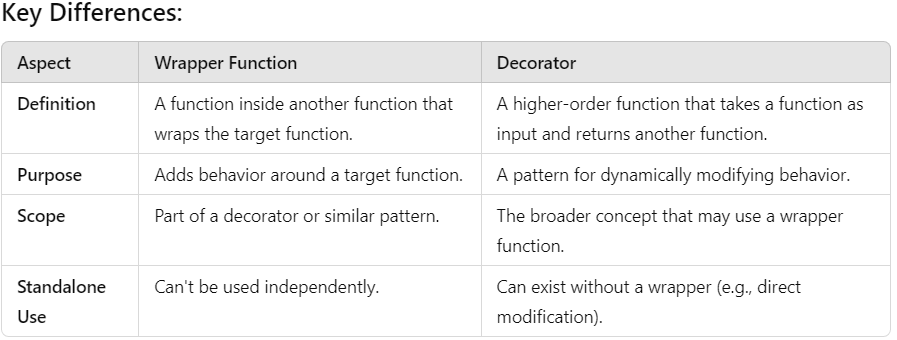